<a href="https://colab.research.google.com/github/kunal-kumar-chaudhary/optical_character_recognition/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 19 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 


In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [5]:
path = "/content/surf.jpeg"

In [6]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(path)
result

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082600593567)]

DRAW RESULTS

In [8]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [9]:
text

'SURF'

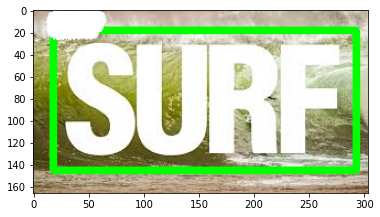

In [13]:
img = cv2.imread(path)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, 0.5, (255,255,255), cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [14]:
path2 = "/content/test_image_2.png"

In [15]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(path2)
result

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[12, 14], [540, 14], [540, 87], [12, 87]],
  'It was the best of',
  0.9658044227820689),
 ([[7, 99], [686, 99], [686, 178], [7, 178]],
  'times, it was the worst',
  0.8699979920837269),
 ([[11, 181], [697, 181], [697, 267], [11, 267]],
  'of times, it was the age',
  0.7349637745627351),
 ([[11, 256], [649, 256], [649, 345], [11, 345]],
  'of wisdom; it was the',
  0.8425616344866556),
 ([[7, 344], [563, 344], [563, 433], [7, 433]],
  'age of foolishness .',
  0.8570522517331303)]

HANDLING MULTIPLE LINES

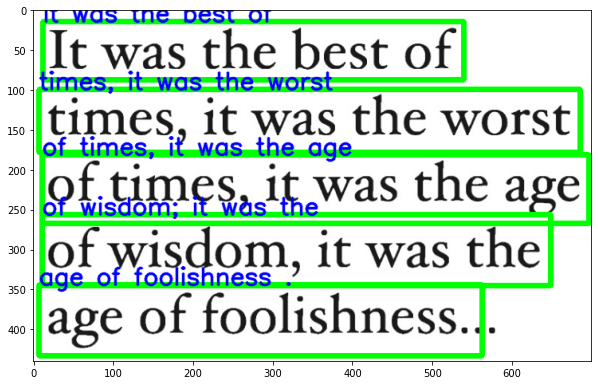

In [27]:
img = cv2.imread(path2)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
  img = cv2.putText(img, text, top_left, font, 1, (0,0,255), 2,  cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()